## Importing the Required Libraries

In [ ]:
import pandas as pd
import re

## Uploading the Required Input File

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sentimentdataset.csv to sentimentdataset.csv


## Reading the input Dataset and display the Features for understanding

In [ ]:
inputFile_df = pd.read_csv('sentimentdataset.csv')
inputFile_df

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20


## Display the Dataset Information

In [ ]:
inputFile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


## Generate more number of records based on the Analysis of the Dataset

In [ ]:
import random
from datetime import datetime, timedelta

original_columns = inputFile_df.columns.tolist()

def modify_text(text):
    words = text.split()
    if len(words) > 1:
        random_index = random.randint(0, len(words) - 1)
        words[random_index] = words[random_index].upper()
    return " ".join(words)

def generate_random_timestamp(original_timestamp):
    original_date = datetime.strptime(original_timestamp, "%Y-%m-%d %H:%M:%S")
    random_offset = timedelta(days=random.randint(-10, 10), hours=random.randint(-5, 5))
    return (original_date + random_offset).strftime("%Y-%m-%d %H:%M:%S")

def generate_new_records(inputFile_df, num_records=100000):
    new_records = []
    for _ in range(num_records):
        sample_record = inputFile_df.sample(1).iloc[0]

        text = modify_text(sample_record["Text"])
        sentiment = sample_record["Sentiment"]
        timestamp = generate_random_timestamp(sample_record["Timestamp"])
        user = f"User{random.randint(100, 999)}"
        platform = sample_record["Platform"]
        hashtags = sample_record["Hashtags"]
        retweets = max(0, int(sample_record.get("Retweets", 0)) + random.randint(-5, 5))
        likes = max(0, int(sample_record.get("Likes", 0)) + random.randint(-10, 10))
        country = sample_record["Country"]
        year, month, day, hour = (
            int(timestamp[:4]),
            int(timestamp[5:7]),
            int(timestamp[8:10]),
            int(timestamp[11:13]),
        )

        new_record = {
            "Text": text,
            "Sentiment": sentiment,
            "Timestamp": timestamp,
            "User": user,
            "Platform": platform,
            "Hashtags": hashtags,
            "Retweets": retweets,
            "Likes": likes,
            "Country": country,
            "Year": year,
            "Month": month,
            "Day": day,
            "Hour": hour,
            "Unnamed: 0": sample_record.get("Unnamed: 0", None),
            "Unnamed: 0.1": sample_record.get("Unnamed: 0.1", None),
        }

        for col in original_columns:
            if col not in new_record:
                new_record[col] = sample_record.get(col, None)

        new_records.append(new_record)

    new_input_df = pd.DataFrame(new_records)[original_columns]
    return new_input_df

num_new_records = 100000
new_input_df = generate_new_records(inputFile_df, num_new_records)

final_input_df = pd.concat([inputFile_df, new_input_df], ignore_index=True)

output_file_path = "new_sentimentdataset.csv"
final_input_df.to_csv(output_file_path, index=False)
final_input_df

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100727,137,139,Elation over discovering a hidden gem in THE c...,Elation,2012-02-26 14:30:00,User139,Twitter,#Elation #HiddenGem,17.0,35.0,USA,2012,2,26,14
100728,392,396,Immersed in the enchanting melodies of a stree...,Melodic,2019-04-11 15:30:00,User696,Twitter,#Melodic #StreetMusic,21.0,43.0,France,2019,4,11,15
100729,479,483,"Draped in the warmth OF kindness, a quilt of c...",Kindness,2019-04-28 17:15:00,User488,Facebook,#Kindness #LoveStitches,24.0,42.0,Brazil,2019,4,28,17
100730,643,647,Survived a challenging physics exam. Equations...,Relief,2023-08-11 09:30:00,User953,Instagram,#PhysicsSurvivor #HighSchoolAdventures,21.0,39.0,USA,2023,8,11,9


In [ ]:
final_input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100732 entries, 0 to 100731
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0.1  100732 non-null  int64  
 1   Unnamed: 0    100732 non-null  int64  
 2   Text          100732 non-null  object 
 3   Sentiment     100732 non-null  object 
 4   Timestamp     100732 non-null  object 
 5   User          100732 non-null  object 
 6   Platform      100732 non-null  object 
 7   Hashtags      100732 non-null  object 
 8   Retweets      100732 non-null  float64
 9   Likes         100732 non-null  float64
 10  Country       100732 non-null  object 
 11  Year          100732 non-null  int64  
 12  Month         100732 non-null  int64  
 13  Day           100732 non-null  int64  
 14  Hour          100732 non-null  int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 11.5+ MB


## Data Cleaning and Preprocessing

In [ ]:
# Dropping the columns whch are not required, such as 'Unnamed: 0.1' and'Unnamed: 0' and
# Cleaning of the 'Text' Column, like removing URLs, special characters, and the extra whitespaces and convert the text to lowercase:

final_input_df = final_input_df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
final_input_df['Text'] = final_input_df['Text'].replace(r'http\S+|www\S+|https\S+', '', regex=True)
final_input_df['Text'] = final_input_df['Text'].replace(r'\W', ' ', regex=True)
final_input_df['Text'] = final_input_df['Text'].replace(r'\s+[a-zA-Z]\s+', ' ', regex=True)
final_input_df['Text'] = final_input_df['Text'].replace(r'\s+', ' ', regex=True)
final_input_df['Text'] = final_input_df['Text'].str.lower()
final_input_df

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,enjoying beautiful day at the park,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,traffic was terrible this morning,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,just finished an amazing workout,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,excited about the upcoming weekend getaway,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,trying out new recipe for dinner tonight,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100727,elation over discovering hidden gem in the city,Elation,2012-02-26 14:30:00,User139,Twitter,#Elation #HiddenGem,17.0,35.0,USA,2012,2,26,14
100728,immersed in the enchanting melodies of street ...,Melodic,2019-04-11 15:30:00,User696,Twitter,#Melodic #StreetMusic,21.0,43.0,France,2019,4,11,15
100729,draped in the warmth of kindness quilt of comp...,Kindness,2019-04-28 17:15:00,User488,Facebook,#Kindness #LoveStitches,24.0,42.0,Brazil,2019,4,28,17
100730,survived challenging physics exam equations yo...,Relief,2023-08-11 09:30:00,User953,Instagram,#PhysicsSurvivor #HighSchoolAdventures,21.0,39.0,USA,2023,8,11,9


## Feature Engineering on the Dataset

In [ ]:
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

final_input_df['is_weekend'] = pd.to_datetime(final_input_df['Timestamp']).dt.dayofweek.apply(lambda x: 1 if x >= 5 else 0)
final_input_df['post_season'] = pd.to_datetime(final_input_df['Timestamp']).dt.month.apply(
    lambda x: 'Spring' if 3 <= x <= 5 else ('Summer' if 6 <= x <= 8 else ('Fall' if 9 <= x <= 11 else 'Winter'))
)

user_post_counts = final_input_df['User'].value_counts()
final_input_df['user_post_count'] = final_input_df['User'].map(user_post_counts)
final_input_df['platform_encoded'] = final_input_df['Platform'].astype('category').cat.codes

all_hashtags = [tag.strip() for tags in final_input_df['Hashtags'].dropna() for tag in tags.split(',')]
hashtag_counts = Counter(all_hashtags)
final_input_df['global_hashtag_frequency'] = final_input_df['Hashtags'].apply(
    lambda x: sum(hashtag_counts[tag.strip()] for tag in str(x).split(',')) if x else 0
)

tfidf = TfidfVectorizer(tokenizer=lambda x: x.split(','), lowercase=True)
tfidf_matrix = tfidf.fit_transform(final_input_df['Hashtags'].fillna(''))
tfidf_features = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
final_input_df = pd.concat([final_input_df.reset_index(drop=True), tfidf_features.reset_index(drop=True)], axis=1)

final_input_df['engagement_score'] = final_input_df['Retweets'] + final_input_df['Likes']
engagement_threshold = final_input_df['engagement_score'].quantile(0.9)
final_input_df['is_viral'] = final_input_df['engagement_score'].apply(lambda x: 1 if x > engagement_threshold else 0)

country_post_counts = final_input_df['Country'].value_counts()
final_input_df['country_post_count'] = final_input_df['Country'].map(country_post_counts)
final_input_df

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,...,#wonder #natureorchestra,#wonder #stargazingadventure,#wonderment #doublerainbow,#yearning #distantwarmth,#yearning #huesofsunset,#zest #carefreespirit,#zest #fieldsofenthusiasm,engagement_score,is_viral,country_post_count
0,enjoying beautiful day at the park,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,0,1631
1,traffic was terrible this morning,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0,971
2,just finished an amazing workout,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0,546
3,excited about the upcoming weekend getaway,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0,1125
4,trying out new recipe for dinner tonight,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,0,5660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100727,elation over discovering hidden gem in the city,Elation,2012-02-26 14:30:00,User139,Twitter,#Elation #HiddenGem,17.0,35.0,USA,2012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0,1631
100728,immersed in the enchanting melodies of street ...,Melodic,2019-04-11 15:30:00,User696,Twitter,#Melodic #StreetMusic,21.0,43.0,France,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,0,285
100729,draped in the warmth of kindness quilt of comp...,Kindness,2019-04-28 17:15:00,User488,Facebook,#Kindness #LoveStitches,24.0,42.0,Brazil,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,0,1543
100730,survived challenging physics exam equations yo...,Relief,2023-08-11 09:30:00,User953,Instagram,#PhysicsSurvivor #HighSchoolAdventures,21.0,39.0,USA,2023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0,8287


## Check for the Class Imbalance

In [ ]:
print("\nCounts of all the Sentiments in the Dataset:")
print(final_input_df['Sentiment'].value_counts())


Counts of all the Sentiments in the Dataset:
Sentiment
Positive            6024
Joy                 5771
Excitement          4372
Contentment         1996
Neutral             1925
                    ... 
Excitement           119
Harmony              118
Nature's Beauty      116
Sorrow               114
Touched              111
Name: count, Length: 279, dtype: int64


## Encoding the Sentiments

In [ ]:
# Strip whitespace from sentiment values to standardize formatting

final_input_df['Sentiment'] = final_input_df['Sentiment'].str.strip()
final_input_df['Sentiment'].unique()

array(['Positive', 'Negative', 'Neutral', 'Anger', 'Fear', 'Sadness',
       'Disgust', 'Happiness', 'Joy', 'Love', 'Amusement', 'Enjoyment',
       'Admiration', 'Affection', 'Awe', 'Disappointed', 'Surprise',
       'Acceptance', 'Adoration', 'Anticipation', 'Bitter', 'Calmness',
       'Confusion', 'Excitement', 'Kind', 'Pride', 'Shame', 'Elation',
       'Euphoria', 'Contentment', 'Serenity', 'Gratitude', 'Hope',
       'Empowerment', 'Compassion', 'Tenderness', 'Arousal', 'Enthusiasm',
       'Fulfillment', 'Reverence', 'Despair', 'Grief', 'Loneliness',
       'Jealousy', 'Resentment', 'Frustration', 'Boredom', 'Anxiety',
       'Intimidation', 'Helplessness', 'Envy', 'Regret', 'Curiosity',
       'Indifference', 'Numbness', 'Melancholy', 'Nostalgia',
       'Ambivalence', 'Determination', 'Zest', 'Hopeful', 'Proud',
       'Grateful', 'Empathetic', 'Compassionate', 'Playful',
       'Free-spirited', 'Inspired', 'Confident', 'Bitterness', 'Yearning',
       'Fearful', 'Apprehensiv

In [ ]:
# Mapping all the different Sentiment Labels to 3 Selected Labels: Positive, Negative and Neutral

dataSentimentMapping = {
    'Positive': 1, 'Happiness': 1, 'Joy': 1, 'Love': 1, 'Amusement': 1, 'Enjoyment': 1, 'Admiration': 1, 'Affection': 1, 'Awe': 1, 'Excitement': 1,
    'Kind': 1, 'Pride': 1, 'Elation': 1, 'Euphoria': 1, 'Contentment': 1, 'Serenity': 1, 'Gratitude': 1, 'Hope': 1, 'Empowerment': 1, 'Compassion': 1,
    'Tenderness': 1, 'Arousal': 1, 'Enthusiasm': 1, 'Fulfillment': 1, 'Reverence': 1, 'Anticipation': 1, 'Curiosity': 1, 'Zest': 1, 'Hopeful': 1,
    'Proud': 1, 'Grateful': 1, 'Empathetic': 1, 'Compassionate': 1, 'Playful': 1, 'Inspired': 1, 'Confident': 1, 'Overjoyed': 1, 'Motivation': 1,
    'Satisfaction': 1, 'Blessed': 1, 'Reflection': 1, 'Positivity': 1, 'Kindness': 1, 'Friendship': 1, 'Success': 1, 'Optimism': 1, 'Wonderment': 1,
    'Enchantment': 1, 'Celebration': 1, 'JoyfulReunion': 1, 'Heartwarming': 1, 'Triumph': 1, 'Accomplishment': 1, 'Adventure': 1, 'Creativity': 1,
    'Vibrancy': 1, 'Enthusiasm': 1, 'Engagement': 1, 'Inspired': 1, 'Wonder': 1, 'Freedom': 1, 'Confidence': 1, 'Ecstasy': 1, 'Happy': 1, 'Surprise': 1,
    'Adoration': 1, 'Appreciation': 1, 'Radiance': 1, 'Rejuvenation': 1, 'Coziness': 1, 'Melodic': 1, 'FestiveJoy': 1, 'InnerJourney': 1,
    'Dazzle': 1, 'Adrenaline': 1, 'ArtisticBurst': 1, 'CulinaryOdyssey': 1, 'Resilience': 1, 'Immersion': 1, 'Spark': 1, 'Marvel': 1, 'Exploration': 1,
    'Amazement': 1, 'Romance': 1, 'Captivation': 1, 'Grandeur': 1, 'Emotion': 1, 'Energy': 1, 'Charm': 1, 'Colorful': 1, 'Hypnotic': 1, 'Journey': 1,
    'Touched': 1, 'Sympathy': 1, 'Renewed Effort': 1, 'Solace': 1, 'Breakthrough': 1, 'Joy in Baking': 1, 'Mesmerizing': 1, 'Culinary Adventure': 1,
    'Winter Magic': 1, 'Thrilling Journey': 1, 'Nature\'s Beauty': 1, 'Celestial Wonder': 1, 'Creative Inspiration': 1, 'Runway Creativity': 1,
    'Ocean\'s Freedom': 1, 'Whispers of the Past': 1, 'Determination': 1, 'Thrill': 1, 'Suspense': 1, 'Relief': 1,

    'Negative': 0, 'Anger': 0, 'Fear': 0, 'Sadness': 0, 'Disgust': 0, 'Disappointed': 0, 'Bitter': 0, 'Shame': 0, 'Grief': 0, 'Loneliness': 0,
    'Jealousy': 0, 'Resentment': 0, 'Frustration': 0, 'Boredom': 0, 'Anxiety': 0, 'Intimidation': 0, 'Helplessness': 0, 'Envy': 0, 'Regret': 0,
    'Despair': 0, 'Isolation': 0, 'Heartbreak': 0, 'Melancholy': 0, 'Sorrow': 0, 'Darkness': 0, 'Desperation': 0, 'Loss': 0, 'Ruins': 0, 'Desolation': 0,
    'Exhaustion': 0, 'Suffering': 0, 'Betrayal': 0, 'Apprehensive': 0, 'Overwhelmed': 0, 'Dismissive': 0, 'Obstacle': 0, 'Pressure': 0, 'Challenge': 0,
    'Miscalculation': 0, 'EmotionalStorm': 0, 'Isolation': 0, 'Confusion': 0, 'Disappointment': 0, 'Regret': 0, 'Numbness': 0, 'Bitterness': 0,
    'Yearning': 0, 'Fearful': 0, 'Jealous': 0, 'Devastated': 0, 'Frustrated': 0, 'Envious': 0, 'Bittersweet': 0,
    'Pensive': 0, 'LostLove': 0, 'Heartache': 0, 'Solitude': 0, 'Sad': 0, 'Hate': 0, 'Bad': 0, 'Loneliness': 0, 'Betrayal': 0, 'EmotionalStorm': 0,
    'Darkness': 0,

    'Neutral': 2, 'Acceptance': 2, 'Calmness': 2, 'Serenity': 2, 'Contentment': 2, 'Curiosity': 2, 'Mindfulness': 2, 'Tranquility': 2, 'Harmony': 2,
    'Wonder': 2, 'Reflection': 2, 'Intrigue': 2, 'PlayfulJoy': 2, 'DreamChaser': 2, 'Contemplation': 2, 'Inspiration': 2, 'Elegance': 2,
    'JoyfulReunion': 2, 'Harmony': 2, 'Iconic': 2, 'Envisioning History': 2, 'Imagination': 2, 'Connection': 2, 'Heartwarming': 2, 'Free-spirited': 2,
    'Equilibrium': 2, 'Equanimity': 2, 'Centered': 2, 'Stillness': 2, 'Indifference': 2, 'Nostalgia': 2, 'Ambivalence': 2, 'Whimsy': 2, 'Sympathy': 2,
    'Solace': 2, 'Reflection': 2, 'Mischievous': 2, 'Embarrassed': 2, 'Bad': 2
}
final_input_df['Sentiment'] = final_input_df['Sentiment'].map(dataSentimentMapping)
final_input_df

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,...,#wonder #natureorchestra,#wonder #stargazingadventure,#wonderment #doublerainbow,#yearning #distantwarmth,#yearning #huesofsunset,#zest #carefreespirit,#zest #fieldsofenthusiasm,engagement_score,is_viral,country_post_count
0,enjoying beautiful day at the park,1,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,0,1631
1,traffic was terrible this morning,0,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0,971
2,just finished an amazing workout,1,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0,546
3,excited about the upcoming weekend getaway,1,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0,1125
4,trying out new recipe for dinner tonight,2,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,0,5660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100727,elation over discovering hidden gem in the city,1,2012-02-26 14:30:00,User139,Twitter,#Elation #HiddenGem,17.0,35.0,USA,2012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0,1631
100728,immersed in the enchanting melodies of street ...,1,2019-04-11 15:30:00,User696,Twitter,#Melodic #StreetMusic,21.0,43.0,France,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,0,285
100729,draped in the warmth of kindness quilt of comp...,1,2019-04-28 17:15:00,User488,Facebook,#Kindness #LoveStitches,24.0,42.0,Brazil,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,0,1543
100730,survived challenging physics exam equations yo...,1,2023-08-11 09:30:00,User953,Instagram,#PhysicsSurvivor #HighSchoolAdventures,21.0,39.0,USA,2023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0,8287


## Splitting the Dataset into Training Set, Validation Set, and Testing Set

In [ ]:
from sklearn.model_selection import train_test_split

X = final_input_df.drop('Sentiment', axis=1)
Y = final_input_df['Sentiment']

x_train, x_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)

x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

## Perform the Classification using a Base Model (XGBoost)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from scipy.sparse import hstack, csr_matrix

label_encoder = LabelEncoder()

final_input_df['platform_encoded'] = label_encoder.fit_transform(final_input_df['Platform'])
final_input_df['country_encoded'] = label_encoder.fit_transform(final_input_df['Country'])

X_train_tfidf = tfidf.fit_transform(x_train['Text'].fillna(''))
X_val_tfidf = tfidf.transform(x_val['Text'].fillna(''))
X_test_tfidf = tfidf.transform(x_test['Text'].fillna(''))

x_train = x_train.drop(columns=['Text', 'Timestamp', 'User', 'Platform', 'Hashtags', 'Country', 'post_season'], errors='ignore')
x_val = x_val.drop(columns=['Text', 'Timestamp', 'User', 'Platform', 'Hashtags', 'Country', 'post_season'], errors='ignore')
x_test = x_test.drop(columns=['Text', 'Timestamp', 'User', 'Platform', 'Hashtags', 'Country', 'post_season'], errors='ignore')

X_train_combined = hstack([X_train_tfidf, csr_matrix(x_train)])
X_val_combined = hstack([X_val_tfidf, csr_matrix(x_val)])
X_test_combined = hstack([X_test_tfidf, csr_matrix(x_test)])

xgb_model = XGBClassifier(n_estimators=300, max_depth=5, learning_rate=0.05, subsample=0.8, colsample_bytree=0.8, tree_method='hist', random_state=42)

xgb_model.fit(X_train_combined, y_train, eval_set=[(X_val_combined, y_val)], verbose=True)

y_val_pred = xgb_model.predict(X_val_combined)
print("Classification Report for Validation Dataset:")
print(classification_report(y_val, y_val_pred, target_names=['Positive', 'Negative', 'Neutral']))
print("Accuracy for Validation Dataset", accuracy_score(y_val, y_val_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[0]	validation_0-mlogloss:1.08017
[1]	validation_0-mlogloss:1.06297
[2]	validation_0-mlogloss:1.04781
[3]	validation_0-mlogloss:1.03306
[4]	validation_0-mlogloss:1.01894
[5]	validation_0-mlogloss:1.00642
[6]	validation_0-mlogloss:0.99455
[7]	validation_0-mlogloss:0.98289
[8]	validation_0-mlogloss:0.97188
[9]	validation_0-mlogloss:0.95999
[10]	validation_0-mlogloss:0.94832
[11]	validation_0-mlogloss:0.93941
[12]	validation_0-mlogloss:0.93109
[13]	validation_0-mlogloss:0.92203
[14]	validation_0-mlogloss:0.91452
[15]	validation_0-mlogloss:0.90713
[16]	validation_0-mlogloss:0.89839
[17]	validation_0-mlogloss:0.89169
[18]	validation_0-mlogloss:0.88430
[19]	validation_0-mlogloss:0.87778
[20]	validation_0-mlogloss:0.87148
[21]	validation_0-mlogloss:0.86620
[22]	validation_0-mlogloss:0.86090
[23]	validation_0-mlogloss:0.85461
[24]	validation_0-mlogloss:0.84828
[25]	validation_0-mlogloss:0.84389
[26]	validation_0-mlogloss:0.83906
[27]	validation_0-mlogloss:0.83478
[28]	validation_0-mlogloss:0.8

## Confusion Matrix for XGBoost

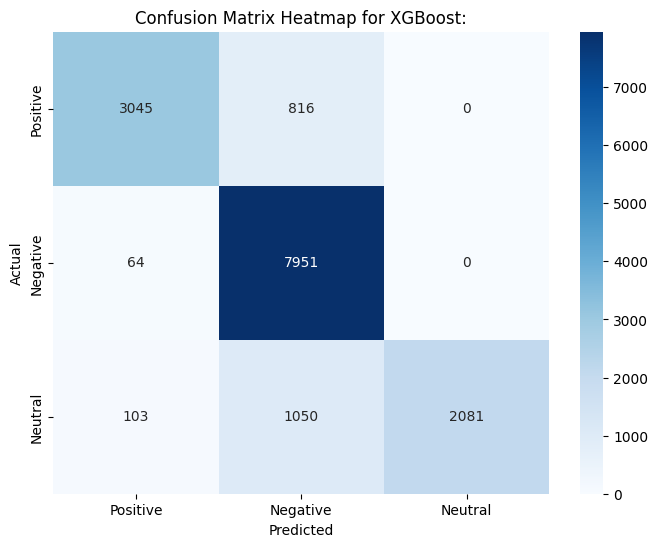

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_val, y_val_pred, labels=xgb_model.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=['Positive', 'Negative', 'Neutral'],
    yticklabels=['Positive', 'Negative', 'Neutral']
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap for XGBoost:")
plt.show()

## Hyperparameter Optimization to improve Model Accuracy and Performance

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(tree_method='hist', random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train_combined, y_train)

print("Best Parameters for XGBoost for the input Dataset:", grid_search.best_params_)
print("Best Accuracy Score for XGBoost for the input Dataset:", grid_search.best_score_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters for XGBoost for the input Dataset: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300, 'subsample': 1.0}
Best Accuracy Score for XGBoost for the input Dataset: 0.9945115724982981


## Perform the Classification using a Transformer-Based Large Language Model (LLM): BERT (Bidirectional Encoder Representations from Transformers)

In [ ]:
!pip install datasets transformers
!pip install wandb

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset, DatasetDict
from sklearn.metrics import classification_report, accuracy_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

x_train['Text'] = final_input_df['Text']
x_train['Sentiment'] = final_input_df['Sentiment']
x_val['Text'] = final_input_df['Text']
x_val['Sentiment'] = final_input_df['Sentiment']
x_test['Text'] = final_input_df['Text']
x_test['Sentiment'] = final_input_df['Sentiment']

train_data = Dataset.from_pandas(x_train[['Text', 'Sentiment']].rename(columns={'Sentiment': 'label'}))
val_data = Dataset.from_pandas(x_val[['Text', 'Sentiment']].rename(columns={'Sentiment': 'label'}))
test_data = Dataset.from_pandas(x_test[['Text', 'Sentiment']].rename(columns={'Sentiment': 'label'}))

dataset = DatasetDict({"train": train_data, "validation": val_data, "test": test_data})

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

def tokenize_function(example):
    return tokenizer(example["Text"], padding="max_length", truncation=True, max_length=128)

tokenized_dataset = dataset.map(tokenize_function, batched=True)

model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)
model.to(device)

training_args = TrainingArguments(
    output_dir="./bert_results",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    save_total_limit=2,
    load_best_model_at_end=True
)

import os
os.environ["WANDB_DISABLED"] = "true"

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["validation"],
    processing_class=tokenizer
)

trainer.train()

val_results = trainer.predict(tokenized_dataset["validation"])
val_predictions = val_results.predictions.argmax(-1)
val_true_labels = val_results.label_ids

print("\nClassification Report for Validation Dataset:")
print(classification_report(val_true_labels, val_predictions, target_names=["Positive", "Negative", "Neutral"]))

val_accuracy = accuracy_score(val_true_labels, val_predictions)
print("Accuracy for Validation Dataset:", val_accuracy)

Using device: cuda


Map:   0%|          | 0/70512 [00:00<?, ? examples/s]

Map:   0%|          | 0/15110 [00:00<?, ? examples/s]

Map:   0%|          | 0/15110 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss
1,0.000000,0.000018
2,0.000000,0.000003
3,0.000000,0.000001



Classification Report for Validation Dataset:
              precision    recall  f1-score   support

    Positive       1.00      1.00      1.00      3861
    Negative       1.00      1.00      1.00      8015
     Neutral       1.00      1.00      1.00      3234

    accuracy                           1.00     15110
   macro avg       1.00      1.00      1.00     15110
weighted avg       1.00      1.00      1.00     15110

Accuracy for Validation Dataset: 1.0


## Perform k-fold Cross-validation on the Validation Dataset and check the model performance again

In [ ]:
from sklearn.model_selection import KFold
from datasets import Dataset
from transformers import Trainer, TrainingArguments
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

validation_data = Dataset.from_pandas(x_val[['Text', 'Sentiment']].rename(columns={'Sentiment': 'label'}))

def tokenize_function(example):
    return tokenizer(example["Text"], padding="max_length", truncation=True, max_length=128)

tokenized_validation_data = validation_data.map(tokenize_function, batched=True)

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

accuracies = []
classification_reports = []

for fold, (train_index, val_index) in enumerate(kf.split(tokenized_validation_data)):
    print(f"\nRunning Fold {fold + 1}/{k}...")

    train_subset = tokenized_validation_data.select(train_index)
    val_subset = tokenized_validation_data.select(val_index)

    trainer = Trainer(
        model=model,
        args=TrainingArguments(
            output_dir=f"./bert_results_fold_{fold + 1}",
            evaluation_strategy="epoch",
            save_strategy="epoch",
            learning_rate=2e-5,
            per_device_train_batch_size=16,
            per_device_eval_batch_size=16,
            num_train_epochs=3,
            weight_decay=0.01,
            logging_dir=f"./logs_fold_{fold + 1}",
            save_total_limit=2,
            load_best_model_at_end=True,
            report_to="none"
        ),
        train_dataset=train_subset,
        eval_dataset=val_subset,
        tokenizer=tokenizer,
    )

    trainer.train()

    val_results = trainer.predict(val_subset)
    val_predictions = val_results.predictions.argmax(-1)
    val_true_labels = val_results.label_ids

    fold_accuracy = accuracy_score(val_true_labels, val_predictions)
    accuracies.append(fold_accuracy)

    print(f"Fold {fold + 1} Accuracy:", fold_accuracy)
    print(f"Fold {fold + 1} Classification Report:")
    report = classification_report(val_true_labels, val_predictions, target_names=["Positive", "Negative", "Neutral"])
    print(report)
    classification_reports.append(report)

print("\nAverage Accuracy for Validation Dataset across folds:", np.mean(accuracies))


Map:   0%|          | 0/15110 [00:00<?, ? examples/s]


Running Fold 1/5...


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-20-eb6e6d3309da>:26: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss
1,0.000000,0.000000
2,0.000000,0.000000
3,0.000000,0.000000


Fold 1 Accuracy: 1.0
Fold 1 Classification Report:
              precision    recall  f1-score   support

    Positive       1.00      1.00      1.00       761
    Negative       1.00      1.00      1.00      1636
     Neutral       1.00      1.00      1.00       625

    accuracy                           1.00      3022
   macro avg       1.00      1.00      1.00      3022
weighted avg       1.00      1.00      1.00      3022


Running Fold 2/5...


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-20-eb6e6d3309da>:26: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss
1,0.000000,0.000000
2,0.000000,0.000000
3,0.000000,0.000000


Fold 2 Accuracy: 1.0
Fold 2 Classification Report:
              precision    recall  f1-score   support

    Positive       1.00      1.00      1.00       750
    Negative       1.00      1.00      1.00      1591
     Neutral       1.00      1.00      1.00       681

    accuracy                           1.00      3022
   macro avg       1.00      1.00      1.00      3022
weighted avg       1.00      1.00      1.00      3022


Running Fold 3/5...


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-20-eb6e6d3309da>:26: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss
1,0.000000,0.000000
2,0.000000,0.000000
3,0.000000,0.000000


Fold 3 Accuracy: 1.0
Fold 3 Classification Report:
              precision    recall  f1-score   support

    Positive       1.00      1.00      1.00       807
    Negative       1.00      1.00      1.00      1580
     Neutral       1.00      1.00      1.00       635

    accuracy                           1.00      3022
   macro avg       1.00      1.00      1.00      3022
weighted avg       1.00      1.00      1.00      3022


Running Fold 4/5...


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-20-eb6e6d3309da>:26: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss
1,0.000000,0.000000
2,0.000000,0.000000
3,0.000000,0.000000


Fold 4 Accuracy: 1.0
Fold 4 Classification Report:
              precision    recall  f1-score   support

    Positive       1.00      1.00      1.00       786
    Negative       1.00      1.00      1.00      1585
     Neutral       1.00      1.00      1.00       651

    accuracy                           1.00      3022
   macro avg       1.00      1.00      1.00      3022
weighted avg       1.00      1.00      1.00      3022


Running Fold 5/5...


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-20-eb6e6d3309da>:26: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss
1,0.000000,0.000000
2,0.000000,0.000000
3,0.000000,0.000000


Fold 5 Accuracy: 1.0
Fold 5 Classification Report:
              precision    recall  f1-score   support

    Positive       1.00      1.00      1.00       757
    Negative       1.00      1.00      1.00      1623
     Neutral       1.00      1.00      1.00       642

    accuracy                           1.00      3022
   macro avg       1.00      1.00      1.00      3022
weighted avg       1.00      1.00      1.00      3022


Average Accuracy for Validation Dataset across folds: 1.0


## Evaluate the Model Performance on the Test Dataset

In [ ]:
test_results = trainer.predict(tokenized_dataset["test"])
test_predictions = test_results.predictions.argmax(-1)
test_true_labels = test_results.label_ids

print("\nClassification Report for Test Dataset:")
print(classification_report(test_true_labels, test_predictions, target_names=["Positive", "Negative", "Neutral"]))

test_accuracy = accuracy_score(test_true_labels, test_predictions)
print("Accuracy for Test Dataset:", test_accuracy)



Classification Report for Test Dataset:
              precision    recall  f1-score   support

    Positive       1.00      1.00      1.00      3784
    Negative       1.00      1.00      1.00      8152
     Neutral       1.00      1.00      1.00      3174

    accuracy                           1.00     15110
   macro avg       1.00      1.00      1.00     15110
weighted avg       1.00      1.00      1.00     15110

Accuracy for Test Dataset: 1.0


## Visualizing the Sentiment Analysis performed by BERT in a UI Application

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 106.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.2/168.2 kB 18.4 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
import gradio as gr
import torch
from transformers import BertTokenizer, BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

def predict_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=128, padding="max_length")
    outputs = model(**inputs)
    predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
    sentiment = ["Positive", "Negative", "Neutral"]
    return sentiment[predictions.argmax().item()]

iface = gr.Interface(fn=predict_sentiment, inputs="text", outputs="text", title="Sentiment Analysis")

iface.launch(share=True)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://84a563cecb1e13b0ec.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
!zip -r /content.zip /content

  adding: content/ (stored 0%)
  adding: content/.config/ (stored 0%)
  adding: content/.config/.last_update_check.json (deflated 22%)
  adding: content/.config/gce (stored 0%)
  adding: content/.config/active_config (stored 0%)
  adding: content/.config/configurations/ (stored 0%)
  adding: content/.config/configurations/config_default (deflated 15%)
  adding: content/.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db (deflated 97%)
  adding: content/.config/.last_survey_prompt.yaml (stored 0%)
  adding: content/.config/logs/ (stored 0%)
  adding: content/.config/logs/2024.12.03/ (stored 0%)
  adding: content/.config/logs/2024.12.03/19.30.51.431465.log (deflated 93%)
  adding: content/.config/logs/2024.12.03/19.31.40.806781.log (deflated 56%)
  adding: content/.config/logs/2024.12.03/19.31.12.843430.log (deflated 58%)
  adding: content/.config/logs/2024.12.03/19.31.25.496350.log (deflated 87%)
  adding: content/.config/logs/2024.12.03/19.31.40.056868.log (deflated 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mv /content.zip /content/drive/MyDrive/